*** In this notebook, the data shall be read manually, as it was obtained after collecting and preproccsing from different notebooks***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
sns.set_style("white")
import scipy 
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.layers import *
from keras.models import *
from keras import backend as K

# Set random seed for reproducibility
tf.random.set_seed(42)

***Read histo_TI_bitcoin_tweet.csv that contains the historical data, along with its technical indicators and the sentiment anaylsis of the bitcoin related tweets***

In [2]:
df1 = pd.read_csv('histo_TI_bitcoin_tweet.csv')

In [3]:
df1.shape

(525, 19)

In [4]:
df1.head()

,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
0,1/22/2021,28732.00,33867.00,30855.90,48155.72162,32112.01,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
1,1/23/2021,31432.19,33488.79,32982.66,16139.81478,32288.56,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2,1/24/2021,30931.21,33086.53,32110.00,13618.80098,32261.87,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
3,1/25/2021,31920.80,34888.00,32293.18,23045.66293,32510.82,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
4,1/26/2021,30830.00,32960.37,32260.52,23535.83892,30407.13,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


In [5]:
df1.dtypes

time                     object
low                     float64
high                    float64
open                    float64
volume                  float64
TOMORROW_CLOSE          float64
ma7                     float64
ma21                    float64
26ema                   float64
12ema                   float64
MACD                    float64
20sd                    float64
upper_band              float64
lower_band              float64
ema                     float64
momentum                float64
log_momentum            float64
Subjectivity Bitcoin    float64
Polarity Bitcoin        float64
dtype: object

In [6]:
df = df1.copy()

In [7]:
df.head()

,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
0,1/22/2021,28732.00,33867.00,30855.90,48155.72162,32112.01,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
1,1/23/2021,31432.19,33488.79,32982.66,16139.81478,32288.56,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2,1/24/2021,30931.21,33086.53,32110.00,13618.80098,32261.87,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
3,1/25/2021,31920.80,34888.00,32293.18,23045.66293,32510.82,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
4,1/26/2021,30830.00,32960.37,32260.52,23535.83892,30407.13,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


In [8]:
# We see Date is an object, so we have to convert it to datetime
df['time'] = df['time'].astype('datetime64[ns]')

In [9]:
df.dtypes

time                    datetime64[ns]
low                            float64
high                           float64
open                           float64
volume                         float64
TOMORROW_CLOSE                 float64
ma7                            float64
ma21                           float64
26ema                          float64
12ema                          float64
MACD                           float64
20sd                           float64
upper_band                     float64
lower_band                     float64
ema                            float64
momentum                       float64
log_momentum                   float64
Subjectivity Bitcoin           float64
Polarity Bitcoin               float64
dtype: object

In [10]:
df.head()

,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
0,2021-01-22,28732.00,33867.00,30855.90,48155.72162,32112.01,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
1,2021-01-23,31432.19,33488.79,32982.66,16139.81478,32288.56,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2,2021-01-24,30931.21,33086.53,32110.00,13618.80098,32261.87,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
3,2021-01-25,31920.80,34888.00,32293.18,23045.66293,32510.82,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
4,2021-01-26,30830.00,32960.37,32260.52,23535.83892,30407.13,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


In [11]:
df = df.set_index('time')

In [12]:
df.head()

,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
time,,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.72162,32112.01,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
2021-01-23,31432.19,33488.79,32982.66,16139.81478,32288.56,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2021-01-24,30931.21,33086.53,32110.00,13618.80098,32261.87,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
2021-01-25,31920.80,34888.00,32293.18,23045.66293,32510.82,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
2021-01-26,30830.00,32960.37,32260.52,23535.83892,30407.13,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


In [13]:
# The data is clean already, but let us try to check for any null or NA vales.
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 0
If any NA values: False


In [14]:
# check the shape of data to know how many sample we have
df.shape

(525, 18)

In [15]:
# Split the data intro train data (90%) and test data (10%)
train_size = int(len(df)*0.90)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [16]:
# Double check the split
train_dataset.head()

,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
time,,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.72162,32112.01,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
2021-01-23,31432.19,33488.79,32982.66,16139.81478,32288.56,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2021-01-24,30931.21,33086.53,32110.00,13618.80098,32261.87,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
2021-01-25,31920.80,34888.00,32293.18,23045.66293,32510.82,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
2021-01-26,30830.00,32960.37,32260.52,23535.83892,30407.13,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


In [17]:
# Split train data to X and y
X_train = train_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_train = train_dataset.loc[:,['TOMORROW_CLOSE']]

# Split test data to X and y
X_test = test_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_test = test_dataset.loc[:,['TOMORROW_CLOSE']]

In [18]:
# Double check the X
X_train.head()

,low,high,open,volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin
time,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.72162,34259.64143,35865.70143,35377.08003,34647.90006,-729.179969,2768.237573,41402.17657,30329.22628,32345.74221,32111.01,10.376954,0.373306,0.075986
2021-01-23,31432.19,33488.79,32982.66,16139.81478,33755.15000,35827.98238,35096.73373,34275.48598,-821.247743,2813.115648,41454.21368,30201.75109,32307.62074,32287.56,10.382437,0.340508,0.044960
2021-01-24,30931.21,33086.53,32110.00,13618.80098,33131.95571,35839.50048,34843.63770,33958.90980,-884.727901,2797.194653,41433.88978,30245.11117,32277.12025,32260.87,10.381610,0.342169,0.069815
2021-01-25,31920.80,34888.00,32293.18,23045.66293,32645.31857,35767.12810,34638.48375,33732.00939,-906.474358,2865.171051,41497.47020,30036.78599,32432.92008,32509.82,10.389297,0.372609,0.037911
2021-01-26,30830.00,32960.37,32260.52,23535.83892,31917.32429,35459.88381,34271.45777,33212.51292,-1058.944854,3080.085635,41620.05508,29299.71254,31082.39336,30406.13,10.322400,0.321886,0.112675


**Data Normalization**

In [19]:
# Different scaler for input and output ----> Normalizate the data
scaler_x = MinMaxScaler(feature_range = (-1,1))
scaler_y = MinMaxScaler(feature_range = (-1,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

**Prepare the data to be fed into the model.
Create 3 D tensor of data.**

In [20]:
# Create 3 dimensional data set 
def threeD_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 15 # which means the model will make predictions of ‘TOMORROW_CLOSE’ based on the input from the 10 previous days or future days bi-lstm or bi-gru

X_test, y_test = threeD_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = threeD_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (457, 15, 17)
y_train.shape:  (457, 1)
X_test.shape:  (38, 15, 17)
y_test.shape:  (38, 1)


**FINALLY, we can CONSTUCT the MODEL**

In [21]:
# Create LSTM 
def create_model(m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = 128, activation = 'relu', return_sequences = False, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))   
    model.compile(loss = 'mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3) ) 
    return model

In [22]:
# Create the model by passing LSTM to the model.
model_lstm = create_model(LSTM)

In [23]:
# Let's check the summary of our baby model
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               74752     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [24]:
# start the  training process, with 50 epochs, (the number of times the model will look at the entire dataset), validation split is 20 % from the training data, this is
# done autmatically by Keras, batch size of 16, meaning that, the model will take try to minimize the loss by looking at only 16 samples, shuffle is false, because this is time 
# data, so the order matters alot.
history_lstm = model_lstm.fit(X_train, y_train, epochs = 50, validation_split = 0.2,batch_size = 16, shuffle = False) 

Epoch 1/50
23/23 [==============================] - 4s 53ms/step - loss: 0.1220 - val_loss: 0.0862
Epoch 2/50
23/23 [==============================] - 1s 28ms/step - loss: 0.0793 - val_loss: 0.0494
Epoch 3/50
23/23 [==============================] - 1s 32ms/step - loss: 0.0346 - val_loss: 0.0212
Epoch 4/50
23/23 [==============================] - 1s 31ms/step - loss: 0.0334 - val_loss: 0.0287
Epoch 5/50
23/23 [==============================] - 1s 35ms/step - loss: 0.0289 - val_loss: 0.0167
Epoch 6/50
23/23 [==============================] - 1s 32ms/step - loss: 0.0270 - val_loss: 0.0243
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 0.0262 - val_loss: 0.0140
Epoch 8/50
23/23 [==============================] - 1s 33ms/step - loss: 0.0232 - val_loss: 0.0208
Epoch 9/50
23/23 [==============================] - 1s 30ms/step - loss: 0.0215 - val_loss: 0.0131
Epoch 10/50
23/23 [==============================] - 1s 29ms/step - loss: 0.0203 - val_loss: 0.0192
Epoch 11/

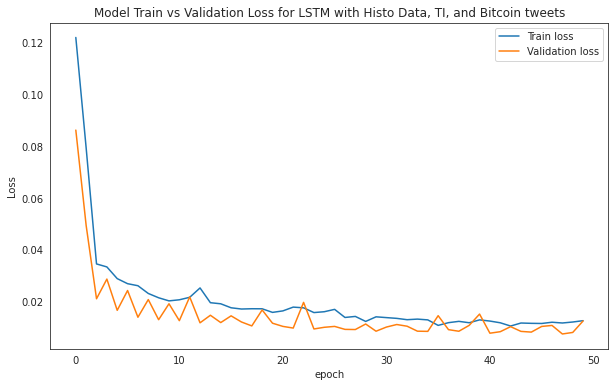

In [25]:
#Plot train and validation loss
def plot_loss (history, model_name):
    fig3 = plt.figure(figsize = (10, 6))
    plt.rcParams['figure.dpi'] = 360
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name + ' with Histo Data, TI, and Bitcoin tweets')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    fig3.savefig('Model_Train_vs_Validation_Loss_for_LSTM_with_TI_Bitcoin_tweets.png')
plot_loss (history_lstm, 'LSTM')


Before we start the testing phase, we need to inverse the normalization process that we applied to the data.

In [26]:
# inverse the y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

Define a function to inverse the X

In [27]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

In [28]:
# Do predictions
prediction_LSTM = prediction(model_lstm)

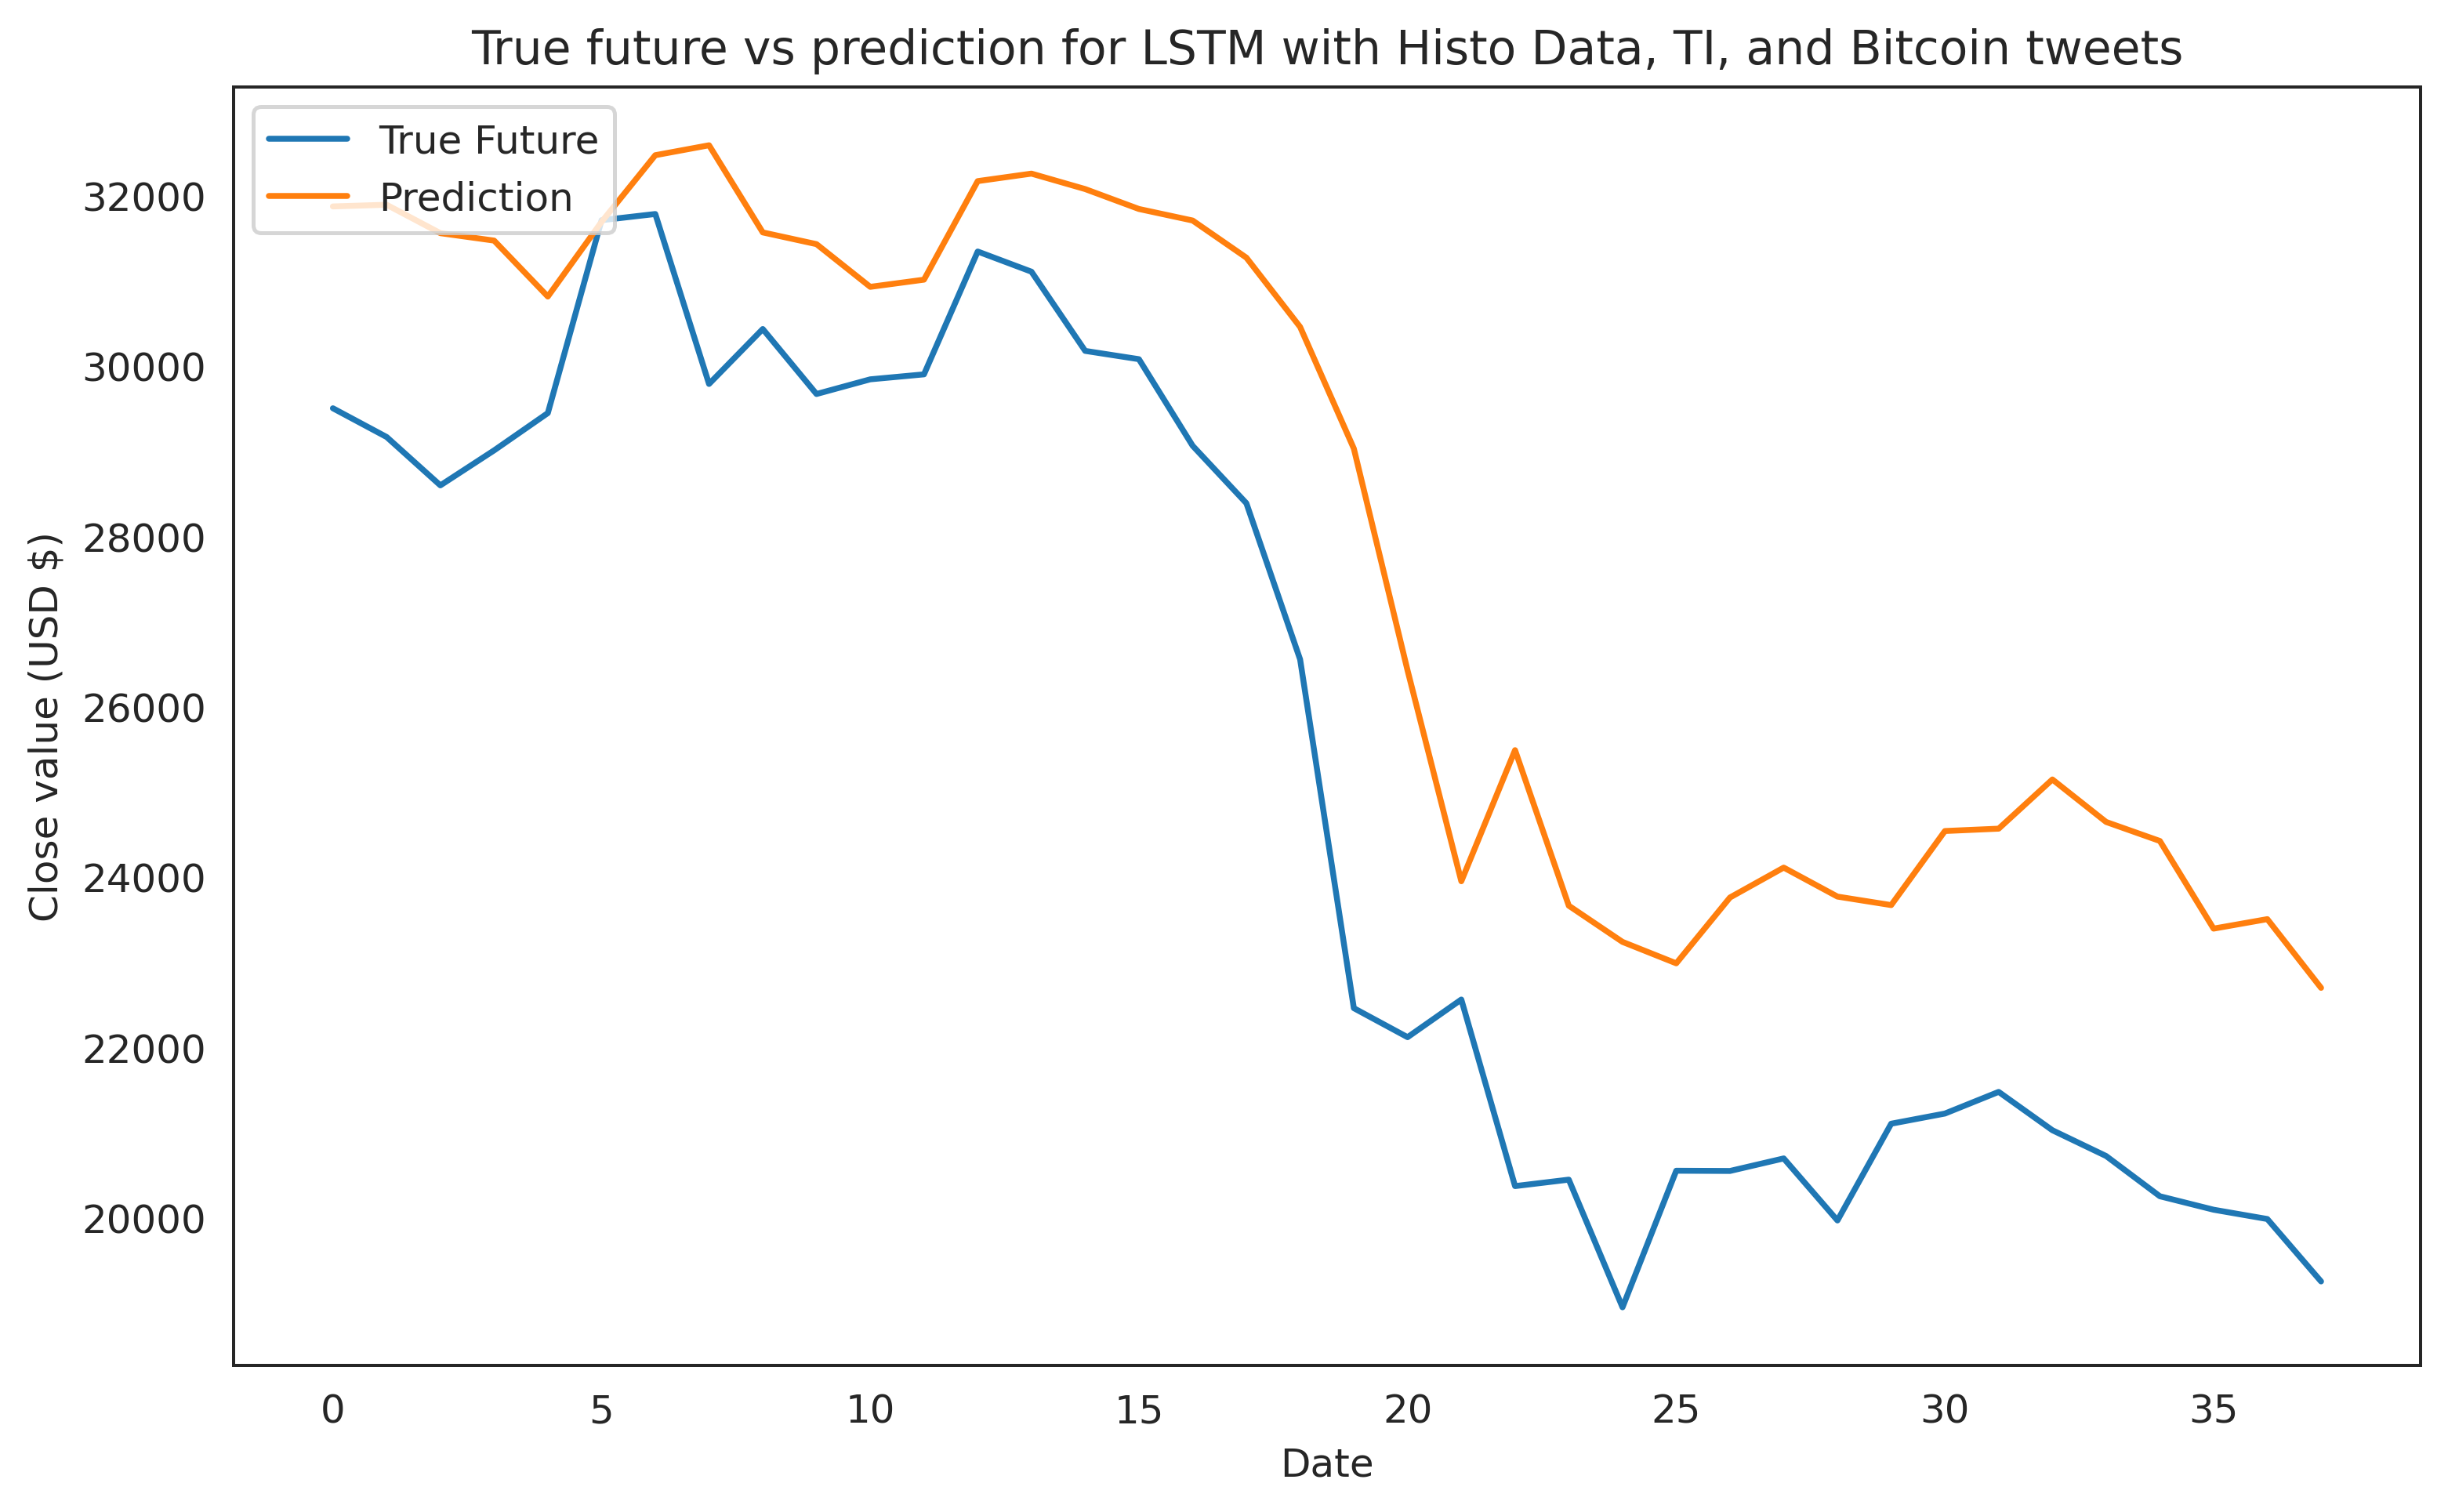

In [29]:
def plot_future(prediction, model_name, y_test):
    fig4 = plt.figure(figsize=(10, 6))
    plt.rcParams['figure.dpi'] = 360
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')
    plt.title('True future vs prediction for ' + model_name + ' with Histo Data, TI, and Bitcoin tweets')
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value (USD $)')
    fig4.savefig('True_future_vs_prediction_for_LSTM_with_TI_Bitcoin_tweets.png')
plot_future(prediction_LSTM, 'LSTM', y_test)

In [30]:
## Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

In [31]:
evaluate_prediction(prediction_LSTM, y_test, 'LSTM-with_TI_Bitcoin_tweets')

LSTM-with_TI_Bitcoin_tweets:
Mean Absolute Error: 2756.8140
Root Mean Square Error: 3065.3601

